**Задача класифікації**

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



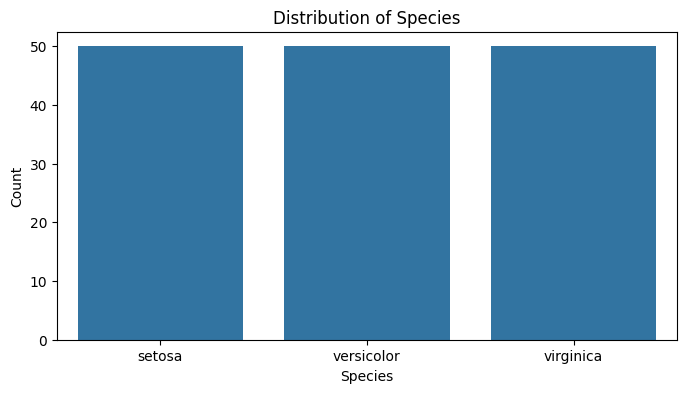

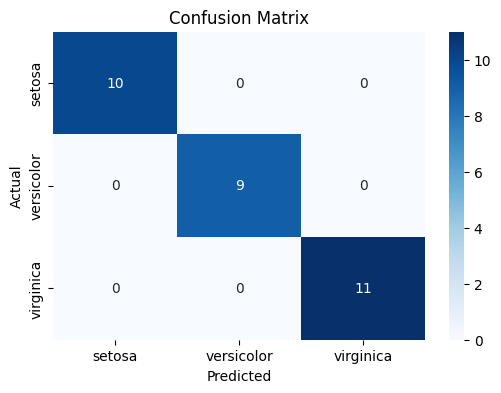

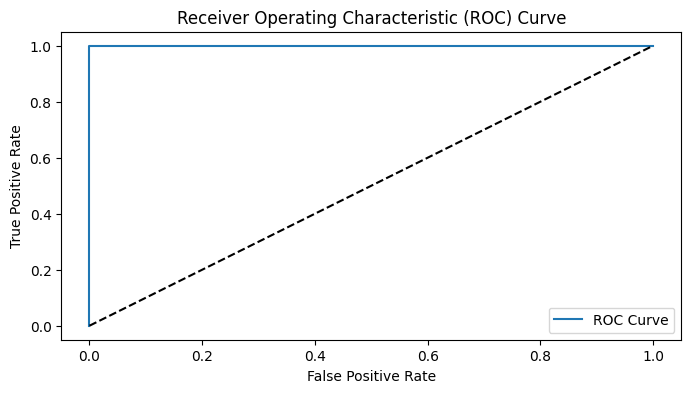

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import seaborn as sns

# Завантаження даних
data = pd.read_csv('/content/iris.csv')

# Пре-процесинг даних
# Перевірка, які стовпці мають текстові значення
print(data.dtypes)

# Кодування текстових значень у стовпці 'species'
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

# Заповнення відсутніх даних
data.fillna(data.mean(), inplace=True)

# Розділення на змінні
X = data.drop('species', axis=1)
y = data['species']

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Навчання моделі
clf = MLPClassifier(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Прогнозування
y_pred = clf.predict(X_test)

# Оцінка метрик
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Виведення метрик
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


# 1. Гістограма розподілу класів
plt.figure(figsize=(8, 4))
sns.countplot(x='species', data=data)
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=label_encoder.inverse_transform([0, 1, 2]))
plt.show()

# 2. Матриця плутанини
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform([0, 1, 2]), yticklabels=label_encoder.inverse_transform([0, 1, 2]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. ROC-крива
# Для ROC-кривої потрібно отримати ймовірності
y_prob = clf.predict_proba(X_test)

# Обчислення ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


**Задача регресії**

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


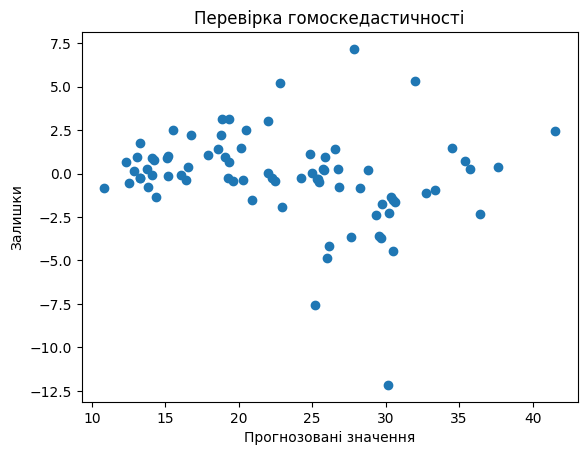

MAE: 1.6674605158935012
RMSE: 2.5964848613895244
P-value нормальності залишків: 7.599494258164309e-08


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.stats as stats
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('/content/auto-mpg.csv')

# Заміняємо '?' на NaN і видаляємо або заповнюємо пропущені значення
data.replace('?', np.nan, inplace=True)

# Перетворюємо всі числові стовпці у правильний тип
data = data.apply(pd.to_numeric, errors='ignore')

# Видалення рядків з пропущеними значеннями
data = data.dropna()

# Огляд даних після очищення
print(data.head())

# Перевірка на текстові стовпці
print(data.dtypes)

# Якщо є категоріальні змінні (наприклад, 'car name'), видаляємо їх
if 'car name' in data.columns:
    data = data.drop('car name', axis=1)

# Розділення на змінні
X = data.drop('mpg', axis=1)  # 'mpg' — це залежна змінна (цільова)
y = data['mpg']

# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Навчання моделі
regressor = MLPRegressor(random_state=42, max_iter=1000)
regressor.fit(X_train, y_train)

# Прогнозування
y_pred = regressor.predict(X_test)

# Оцінка метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Перевірка нормальності залишків
residuals = y_test - y_pred
_, p_value = stats.normaltest(residuals)

# Перевірка на гомоскедастичність
plt.scatter(y_pred, residuals)
plt.xlabel('Прогнозовані значення')
plt.ylabel('Залишки')
plt.title('Перевірка гомоскедастичності')
plt.show()

# Виведення метрик
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'P-value нормальності залишків: {p_value}')
